# Histogram of modalities

In [1]:
library(ggpubr)
library(tidyverse)

Loading required package: ggplot2

-- Attaching packages --------------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [5]:
save_plot <- function(p, fn, w, h){
    for(ext in c(".pdf", ".png", ".svg")){
        ggsave(filename=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

get_modality_degs <- function(){
    datalist = list()
    for(tissue in c('Caudate', 'DLPFC', 'Hippocampus', 'Dentate Gyrus')){
        if(tissue == 'Dentate Gyrus'){
            fn = paste0("../../../../dentateGyrus/bimodal_detection/",
                        "_m/degs_with_modality.txt")
        } else {
            fn = paste0("../../../../", tolower(tissue),
                        "/bimodal_detection/_m/degs_with_modality.txt")
        }
        
        dat = read_tsv(fn) 
        dat$Tissue <- tissue
        datalist[[tissue]] <- dat
    }
    df = bind_rows(datalist)
    return(df)
}

In [9]:
modality <- get_modality_degs() 
modality %>% dim
modality %>% head(2)

Warning message:
"Missing column names filled in: 'X1' [1]"

-- Column specification --------------------------------------------------------------------------------------------------------------------------------------
cols(
  X1 = col_character(),
  Length = col_double(),
  gencodeID = col_character(),
  ensemblID = col_character(),
  gene_type = col_character(),
  Symbol = col_character(),
  EntrezID = col_double(),
  Class = col_character(),
  meanExprs = col_double(),
  NumTx = col_double(),
  gencodeTx = col_character(),
  logFC = col_double(),
  AveExpr = col_double(),
  t = col_double(),
  P.Value = col_double(),
  adj.P.Val = col_double(),
  B = col_double(),
  Modality_AA = col_double(),
  Modality_EA = col_double()
)


Warning message:
"Missing column names filled in: 'X1' [1]"

-- Column specification --------------------------------------------------------------------------------------------------------------------------------------
cols(
  X1 = col_character(),
  Length =

[1] 16308    20

X1,Length,gencodeID,ensemblID,gene_type,Symbol,EntrezID,Class,meanExprs,NumTx,gencodeTx,logFC,AveExpr,t,P.Value,adj.P.Val,B,Modality_AA,Modality_EA,Tissue
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000272977.1,3754,ENSG00000272977.1,ENSG00000272977,sense_intronic,NA,NA,InGen,0.4474506,1,ENST00000609475.1,1.743231,1.228220,15.82266,1.335410e-43,2.997861e-39,87.87375,2,1,Caudate
ENSG00000182698.11,1140,ENSG00000182698.11,ENSG00000182698,protein_coding,RESP18,389075,InGen,2.8210515,3,ENST00000470719.1|ENST00000392083.5|ENST00000333527.5,2.730990,1.408244,15.34621,1.242416e-41,1.394549e-37,83.53926,2,2,Caudate


In [10]:
modality <- modality %>% select(gencodeID, gene_type, Symbol, logFC, t, 
                                "adj.P.Val", starts_with("Modal"), Tissue) 
modality %>% head(2)

gencodeID,gene_type,Symbol,logFC,t,adj.P.Val,Modality_AA,Modality_EA,Tissue
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000272977.1,sense_intronic,NA,1.743231,15.82266,2.997861e-39,2,1,Caudate
ENSG00000182698.11,protein_coding,RESP18,2.730990,15.34621,1.394549e-37,2,2,Caudate


Warning message:
"Using `bins = 30` by default. Pick better value with the argument `bins`."
ERROR while rich displaying an object: Error: StatBin requires a continuous x variable: the x variable is discrete.Perhaps you want stat="count"?

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         retu

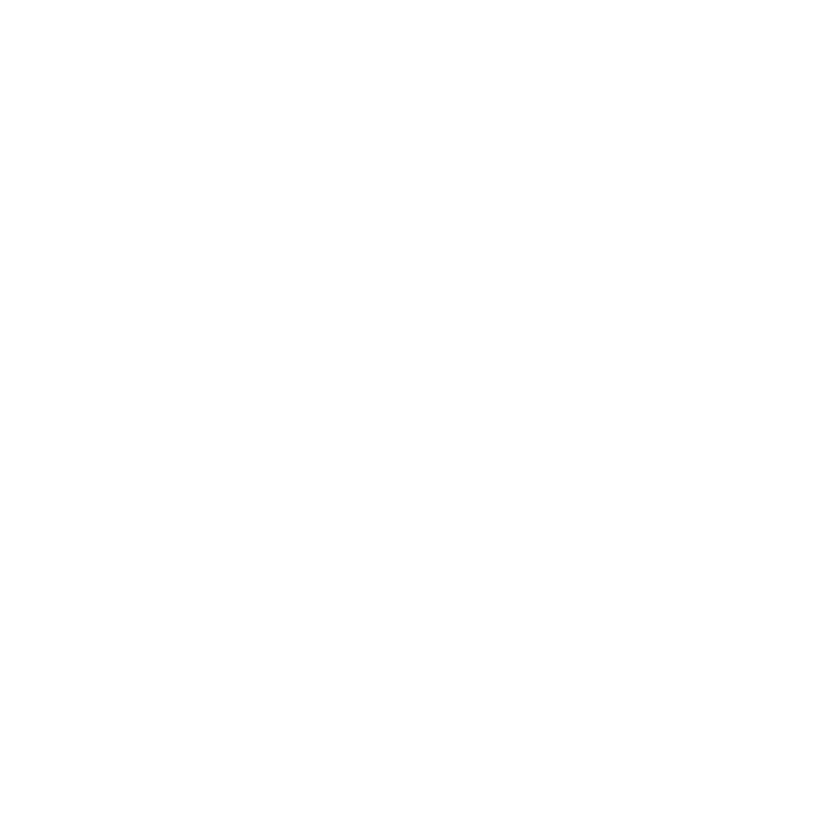

In [25]:
modality %>% mutate_if(is.character, as.factor) %>% 
    mutate(Modality_AA = as.factor(Modality_AA), Modality_EA = as.factor(Modality_EA)) %>%
    gghistogram(x="Modality_AA")